# Fitbit

In [28]:
import pickle
import pandas as pd
import seaborn as sns

In [29]:
cmap = ["#7570b3", "#1d84c6", "#0095bf", "#00a0a1", "#00a676", "#3da95b", "#63aa3a",
          "#88a906", "#a0ab00", "#b7ac00", "#cfac00", "#e6ab01"]
sns.set_palette(sns.color_palette(cmap))

In [30]:
# loading the data
infile = open('data/daily_fitbit_sema_df_unprocessed.pkl','rb')
df = pickle.load(infile)
infile.close()
df.head()

,id,date,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,...,step_goal,min_goal,max_goal,step_goal_label,HAPPY,NEUTRAL,TENSE/ANXIOUS,HOME,OUTDOORS,WORK/SCHOOL
0,621e2e8e67b776a24055b564,2021-05-24,34.137687,57.432,89.603,NaN,14.8,78.0,0.833333,0.675,...,None,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
1,621e2e8e67b776a24055b564,2021-05-25,33.794544,57.681,94.303,NaN,15.8,80.0,0.833333,0.725,...,None,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
2,621e2e8e67b776a24055b564,2021-05-26,34.611011,57.481,119.212,NaN,14.6,84.0,0.966667,0.725,...,None,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
3,621e2e8e67b776a24055b564,2021-05-27,34.408304,57.493,111.709,NaN,14.8,82.0,0.933333,0.725,...,None,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
4,621e2e8e67b776a24055b564,2021-05-28,34.178922,56.750,103.034,NaN,15.2,81.0,0.866667,0.725,...,None,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# selecting round1
df = df.sort_values(by='date', ascending=True)
df['date'] = pd.to_datetime(df['date'].astype("str"), format='%Y-%m-%d')
df1 = (df['date'] >= "2021-05-24") & (df['date'] <= "2021-07-26")
df = df.loc[df1]
df.head()

,id,date,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,...,step_goal,min_goal,max_goal,step_goal_label,HAPPY,NEUTRAL,TENSE/ANXIOUS,HOME,OUTDOORS,WORK/SCHOOL
0,621e2e8e67b776a24055b564,2021-05-24,34.137687,57.432,89.603,NaN,14.8,78.0,0.833333,0.675,...,None,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
1588,621e301e67b776a240608a72,2021-05-24,34.710232,NaN,NaN,NaN,NaN,74.0,0.700000,0.700,...,None,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
1524,621e301367b776a24057738e,2021-05-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
6258,621e360b67b776a24039709f,2021-05-24,NaN,68.321,31.413,NaN,15.4,69.0,0.633333,0.650,...,None,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
1313,621e2fce67b776a240279baa,2021-05-24,34.783747,83.170,15.941,96.6,15.2,70.0,0.733333,0.725,...,None,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# keep only fitbit stress score (daily granularity)
fitbit_stress=df[['id', 'date','stress_score']]
fitbit_stress.head()

,id,date,stress_score
0,621e2e8e67b776a24055b564,2021-05-24,78.0
1588,621e301e67b776a240608a72,2021-05-24,74.0
1524,621e301367b776a24057738e,2021-05-24,NaN
6258,621e360b67b776a24039709f,2021-05-24,69.0
1313,621e2fce67b776a240279baa,2021-05-24,70.0


<AxesSubplot: >

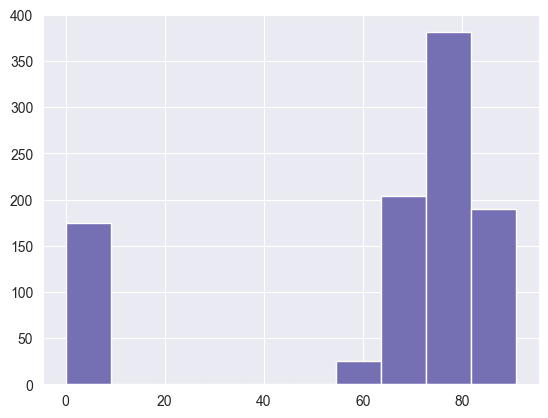

In [33]:
fitbit_stress['stress_score'].hist()

In [34]:
# handle nans
fitbit_stress['stress_score'].isna().sum()

1764

In [35]:
# drop rows with Nan values
fitbit_stress=fitbit_stress.dropna()
fitbit_stress['stress_score'].isna().sum()

0

In [36]:
# delete 0.0 values? outliers? corrupted data?
fitbit_stress=fitbit_stress.loc[(fitbit_stress['stress_score'] > 40)]

<AxesSubplot: >

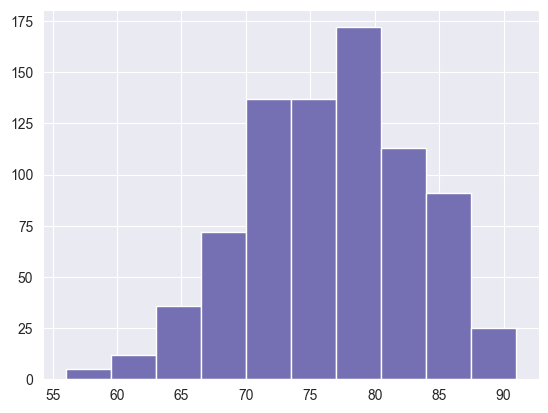

In [37]:
fitbit_stress['stress_score'].hist()

In [38]:
# user daily average stress_score
fitbit_stress['user_daily_mean_stress'] = fitbit_stress.groupby(['id'])['stress_score'].transform('mean')
# variation from each user's baseline
fitbit_stress['variation_from_user_baseline'] = fitbit_stress['stress_score']-fitbit_stress['user_daily_mean_stress']

fitbit_stress

,id,date,stress_score,user_daily_mean_stress,variation_from_user_baseline
0,621e2e8e67b776a24055b564,2021-05-24,78.0,75.859649,2.140351
1588,621e301e67b776a240608a72,2021-05-24,74.0,76.000000,-2.000000
6258,621e360b67b776a24039709f,2021-05-24,69.0,70.282051,-1.282051
1313,621e2fce67b776a240279baa,2021-05-24,70.0,77.492063,-7.492063
746,621e2f3967b776a240c654db,2021-05-24,76.0,77.384615,-1.384615
...,...,...,...,...,...
3135,621e326767b776a24012e179,2021-07-26,84.0,81.258065,2.741935
4294,621e337667b776a240ce78ab,2021-07-26,77.0,73.559322,3.440678
951,621e2f6167b776a240e082a9,2021-07-26,71.0,69.242424,1.757576
1376,621e2fce67b776a240279baa,2021-07-26,81.0,77.492063,3.507937


In [39]:
fitbit_stress=fitbit_stress.resample('D', on='date').mean()
fitbit_stress.reset_index()

,date,stress_score,user_daily_mean_stress,variation_from_user_baseline
0,2021-05-24,74.500000,76.750553,-2.250553
1,2021-05-25,75.411765,75.670390,-0.258626
2,2021-05-26,76.846154,76.163271,0.682883
3,2021-05-27,77.312500,75.508691,1.803809
4,2021-05-28,74.928571,75.747080,-0.818509
...,...,...,...,...
59,2021-07-22,72.285714,76.742438,-4.456724
60,2021-07-23,76.000000,76.992854,-0.992854
61,2021-07-24,76.333333,76.376839,-0.043506
62,2021-07-25,77.000000,76.861444,0.138556


In [40]:
fitbit_stress=fitbit_stress.drop(columns=['user_daily_mean_stress'])
fitbit_stress.reset_index()

,date,stress_score,variation_from_user_baseline
0,2021-05-24,74.500000,-2.250553
1,2021-05-25,75.411765,-0.258626
2,2021-05-26,76.846154,0.682883
3,2021-05-27,77.312500,1.803809
4,2021-05-28,74.928571,-0.818509
...,...,...,...
59,2021-07-22,72.285714,-4.456724
60,2021-07-23,76.000000,-0.992854
61,2021-07-24,76.333333,-0.043506
62,2021-07-25,77.000000,0.138556


# Semas

In [41]:
# loading the complete dataframe
infile = open('data/hourly_fitbit_sema_df_unprocessed.pkl','rb')
df = pickle.load(infile)
infile.close()
df.head()

,id,date,hour,temperature,badgeType,calories,distance,activityType,bpm,mindfulness_session,...,TENSE/ANXIOUS,TIRED,ENTERTAINMENT,GYM,HOME,HOME_OFFICE,OTHER,OUTDOORS,TRANSIT,WORK/SCHOOL
0,621e2e8e67b776a24055b564,2021-05-24,0.0,-1.466659,NaN,NaN,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,621e2e8e67b776a24055b564,2021-05-24,1.0,0.210289,NaN,NaN,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,621e2e8e67b776a24055b564,2021-05-24,2.0,-1.359378,NaN,NaN,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,621e2e8e67b776a24055b564,2021-05-24,3.0,-0.316295,NaN,NaN,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,621e2e8e67b776a24055b564,2021-05-24,4.0,0.416455,NaN,NaN,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# selecting round1
df = df.sort_values(by='date', ascending=True)
df['date'] = pd.to_datetime(df['date'].astype("str"), format='%Y-%m-%d')
df1 = (df['date'] >= "2021-05-24") & (df['date'] <= "2021-07-26")
df = df.loc[df1]
df.head()

,id,date,hour,temperature,badgeType,calories,distance,activityType,bpm,mindfulness_session,...,TENSE/ANXIOUS,TIRED,ENTERTAINMENT,GYM,HOME,HOME_OFFICE,OTHER,OUTDOORS,TRANSIT,WORK/SCHOOL
73288,621e375b67b776a240290cdc,2021-05-24,12.0,-3.419289,NaN,74.79,61.0,NaN,87.224568,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73291,621e375b67b776a240290cdc,2021-05-24,15.0,-1.774123,NaN,67.38,33.5,NaN,79.456238,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73289,621e375b67b776a240290cdc,2021-05-24,13.0,-2.721373,NaN,61.28,5.9,NaN,82.461977,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73290,621e375b67b776a240290cdc,2021-05-24,14.0,-2.127539,NaN,61.19,10.5,NaN,80.915596,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73296,621e375b67b776a240290cdc,2021-05-24,20.0,-5.229789,NaN,147.07,1075.6,NaN,89.535649,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
# keep only sema mood answers
sema_stress=df[['id', 'date','ALERT','HAPPY','NEUTRAL','RESTED/RELAXED','SAD','TENSE/ANXIOUS','TIRED']]

In [44]:
# handle nans
sema_stress.isna().sum()

id                    0
date                  0
ALERT             35738
HAPPY             35738
NEUTRAL           35738
RESTED/RELAXED    35738
SAD               35738
TENSE/ANXIOUS     35738
TIRED             35738
dtype: int64

In [45]:
# drop rows with Nan values
sema_stress=sema_stress.dropna()
sema_stress.isna().sum()

id                0
date              0
ALERT             0
HAPPY             0
NEUTRAL           0
RESTED/RELAXED    0
SAD               0
TENSE/ANXIOUS     0
TIRED             0
dtype: int64

In [46]:
sema_stress=sema_stress.resample('D', on='date').sum()
sema_stress

,ALERT,HAPPY,NEUTRAL,RESTED/RELAXED,SAD,TENSE/ANXIOUS,TIRED
date,,,,,,,
2021-05-24,0.0,3.0,0.0,4.0,1.0,2.0,3.0
2021-05-25,5.0,8.0,0.0,13.0,3.0,11.0,15.0
2021-05-26,6.0,8.0,0.0,15.0,1.0,6.0,19.0
2021-05-27,7.0,8.0,0.0,13.0,5.0,5.0,16.0
2021-05-28,7.0,11.0,0.0,13.0,1.0,7.0,14.0
...,...,...,...,...,...,...,...
2021-07-22,0.0,4.0,7.0,10.0,2.0,6.0,5.0
2021-07-23,4.0,1.0,5.0,3.0,0.0,7.0,9.0
2021-07-24,0.0,10.0,4.0,8.0,0.0,3.0,4.0


In [47]:
# grouping the emotions
sema_stress['positive feelings'] = sema_stress['HAPPY'] + sema_stress['NEUTRAL'] + sema_stress['RESTED/RELAXED']
sema_stress['negative feelings'] =sema_stress['ALERT'] + sema_stress['SAD'] + sema_stress['TENSE/ANXIOUS'] + sema_stress['TIRED']

sema_stress

,ALERT,HAPPY,NEUTRAL,RESTED/RELAXED,SAD,TENSE/ANXIOUS,TIRED,positive feelings,negative feelings
date,,,,,,,,,
2021-05-24,0.0,3.0,0.0,4.0,1.0,2.0,3.0,7.0,6.0
2021-05-25,5.0,8.0,0.0,13.0,3.0,11.0,15.0,21.0,34.0
2021-05-26,6.0,8.0,0.0,15.0,1.0,6.0,19.0,23.0,32.0
2021-05-27,7.0,8.0,0.0,13.0,5.0,5.0,16.0,21.0,33.0
2021-05-28,7.0,11.0,0.0,13.0,1.0,7.0,14.0,24.0,29.0
...,...,...,...,...,...,...,...,...,...
2021-07-22,0.0,4.0,7.0,10.0,2.0,6.0,5.0,21.0,13.0
2021-07-23,4.0,1.0,5.0,3.0,0.0,7.0,9.0,9.0,20.0
2021-07-24,0.0,10.0,4.0,8.0,0.0,3.0,4.0,22.0,7.0


In [48]:
# combining both dataframes
stress_round1 = pd.concat( [fitbit_stress, sema_stress], axis=1)
stress_round1.reset_index()

,date,stress_score,variation_from_user_baseline,ALERT,HAPPY,NEUTRAL,RESTED/RELAXED,SAD,TENSE/ANXIOUS,TIRED,positive feelings,negative feelings
0,2021-05-24,74.500000,-2.250553,0.0,3.0,0.0,4.0,1.0,2.0,3.0,7.0,6.0
1,2021-05-25,75.411765,-0.258626,5.0,8.0,0.0,13.0,3.0,11.0,15.0,21.0,34.0
2,2021-05-26,76.846154,0.682883,6.0,8.0,0.0,15.0,1.0,6.0,19.0,23.0,32.0
3,2021-05-27,77.312500,1.803809,7.0,8.0,0.0,13.0,5.0,5.0,16.0,21.0,33.0
4,2021-05-28,74.928571,-0.818509,7.0,11.0,0.0,13.0,1.0,7.0,14.0,24.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...
59,2021-07-22,72.285714,-4.456724,0.0,4.0,7.0,10.0,2.0,6.0,5.0,21.0,13.0
60,2021-07-23,76.000000,-0.992854,4.0,1.0,5.0,3.0,0.0,7.0,9.0,9.0,20.0
61,2021-07-24,76.333333,-0.043506,0.0,10.0,4.0,8.0,0.0,3.0,4.0,22.0,7.0
62,2021-07-25,77.000000,0.138556,0.0,4.0,3.0,11.0,0.0,1.0,7.0,18.0,8.0


<AxesSubplot: >

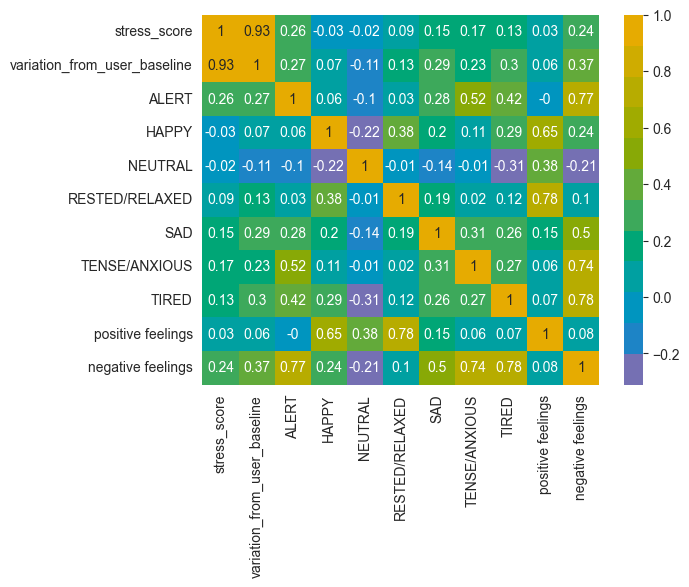

In [49]:
correlation_matrix = stress_round1.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True,cmap=cmap)